# Obtener Datos a través de APIs

![api](https://www.meme-arsenal.com/memes/6200d14d795eab11d26a3afabed68439.jpg)

## Que quedamos que eran...?

Application Programming Interface

Una serie de Reglas y maneras de comunicarnos con Aplicaciones o Sistemas  de Sw para Obtener información o construir Sw


## Aguantame tantito, antes tenemos que ver que sonn los json


### Son el estandar de como transferir los datos a través de las APIs

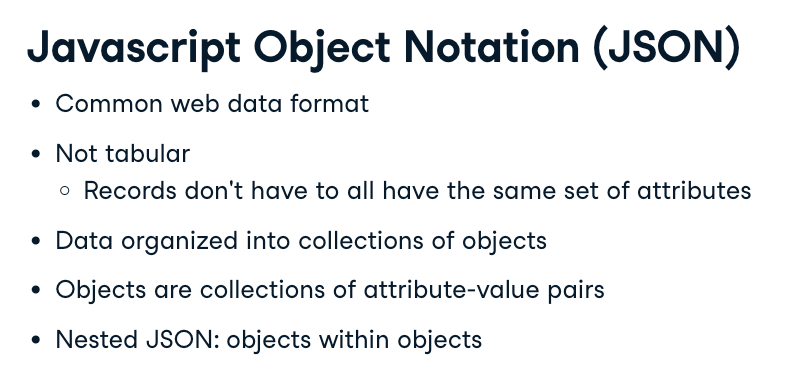


![json](https://i.pinimg.com/736x/7c/2a/8d/7c2a8d5b749ca8a9f313ca0e15c844a4.jpg)

In [ ]:
import json
import pandas as pd

In [ ]:
json_data = open('data-text.json').read()

![json](https://pbs.twimg.com/media/ERqHayrXsAAhs9y.jpg)

In [ ]:
data = json.loads(json_data)
data

In [ ]:
pd.DataFrame(data)

In [ ]:
# !conda install requests
import requests

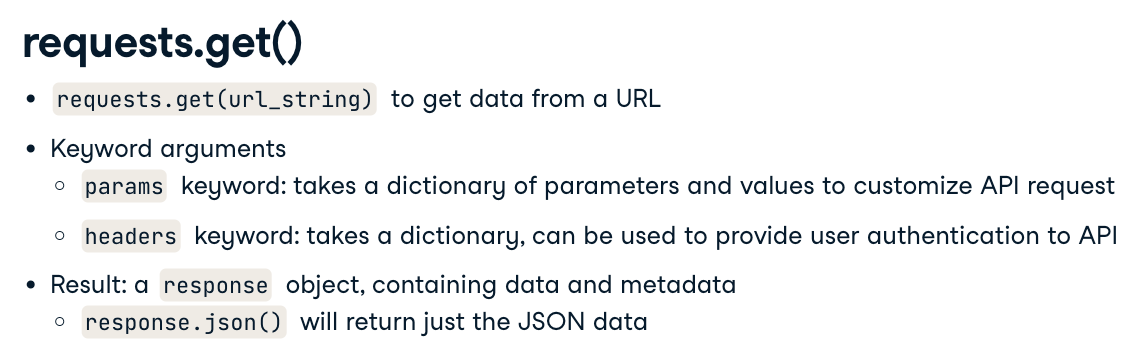



### Ejercicio de Sw 👇🏼

### Más APIs


![more_apis](https://miro.medium.com/max/860/1*bopgnrkjyiu6usW4xecmqw.jpeg)


## API de CoinGecko Para ver status de Cryptos



In [ ]:
coing_url = 'https://api.coingecko.com/api/v3/coins/'

coins = requests.get(coing_url, params=params)
coins

In [ ]:
pd.json_normalize(coins.json())

## Query Parameters! 🙊

In [ ]:
# Estación Espacial Internacional

parameters = {
    "lat": 40.71,
    "lon": -74,
    "n": 9
}
response = requests.get("http://api.open-notify.org/iss-pass.json", params = parameters)
pd.json_normalize(response.json()['response'])

## API de YELP para buscar Info de negocios

In [ ]:
yelp_api_url = "https://api.yelp.com/v3/businesses/search"
params = {
    "term": "bookstore",
    "location": "San Francisco"
}

api_key_yelp = 'Q5VD42FqOtGMzUCmrMp8_IfjHByPAnMj-5qBLDLHJwkU9JE2kmfYWCwDC6JbxCrK6tY9-_qRUK1WW2Q-lzQdNjriDQNy1Y7RRcLh6IFuEnzDuOEItPJjkHDx3OmqYHYx'

headers = {"Authorization": "Bearer {}".format(api_key_yelp)}

response = requests.get(yelp_api_url, 
                        headers=headers, 
                        params=params)

response


In [ ]:
data = response.json()
data

In [ ]:
bookstore = pd.DataFrame(data["businesses"])
bookstore

## Buscamos otro negocio en otro Lugar

In [ ]:
params = {
    "term": "pizza",
    "location": "Mexico City"
}
%store -r YELP_API_KEY
yelp_api_url = "https://api.yelp.com/v3/businesses/search"
api_key_yelp = YELP_API_KEY

In [ ]:
print(YELP_API_KEY)
headers = {"Authorization": "Bearer {}".format(api_key_yelp)}
response = requests.get(yelp_api_url, 
                        headers=headers, 
                        params=params)

response

In [ ]:
pd.DataFrame(response.json()['businesses'])

## Buscando por LatLng

In [ ]:
params = {
    "term": "pizza",
    "latitude": "19.410997",
    "longitude": "-99.1439637",
    "radius": 1500
}
yelp_api_url = "https://api.yelp.com/v3/businesses/search"
api_key_yelp = YELP_API_KEY
headers = {"Authorization": "Bearer {}".format(api_key_yelp)}
response = requests.get(yelp_api_url, 
                        headers=headers, 
                        params=params).json()

response

In [ ]:
pd.DataFrame(response['businesses'])

### Datos anidados dentro de las columnas

In [ ]:
bookstore[["categories", "coordinates", "location"]]

In [ ]:
bookstore_norm = pd.json_normalize(data["businesses"],
                       sep="_")

In [ ]:
bookstore_norm

In [ ]:
bookstore_ultra_norm =  pd.json_normalize(data["businesses"],
                            sep="_",
                    		record_path="categories")


print(bookstore_ultra_norm.head())

In [ ]:
# Load other business attributes and set meta prefix
flat_cafes = pd.json_normalize(data["businesses"],
                            sep="_",
                    		record_path="categories",
                    		meta=["name", 
                                  "alias",  
                                  "rating",
                                  "phone",
                                  "display_phone",
                                  "distance",
                          		  ["coordinates", "latitude"], 
                          		  ["coordinates", "longitude"]],
                    		meta_prefix="biz_")

print(flat_cafes.head())

## Importar Tweets! 🤯

In [ ]:
!pip install tweepy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# Pass OAuth details to tweepy's OAuth handler

%store -r access_token
%store -r access_token_secret
%store -r api_key
%store -r api_key_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

In [ ]:
public_tweets = api.home_timeline()
holi = []
for tweet in public_tweets:
    print(tweet._json)
    holi.append(tweet._json)
holi
pd.DataFrame(holi)

In [ ]:
me_tweets =  api.user_timeline(screen_name="@HectorCastelan", count=5)
holi = []
for tweet in me_tweets:
    print(tweet._json)
    holi.append(tweet._json)
holi
pd.DataFrame(holi)

In [ ]:
me_tweets =  api.get_user(screen_name="@user_buscar_en_pag", count=5)
print(me_tweets._json)

In [ ]:
#Contruir solo con algunas columnas (.keys())

public_tweets = api.home_timeline(count=5)
holi = []
for tweet in public_tweets:
    print(tweet._json)
    holi.append(tweet._json)
pd.DataFrame(holi, columns=['text', 'lang'])

In [ ]:
search_term = "#elon+musk -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-12-01').items(500)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

In [ ]:
all_tweets_no_urls[0].lower().split()

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))
all_words_no_urls


In [ ]:
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(50)

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

In [ ]:
nltk.download('stopwords')

In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [ ]:
tweets_nsw

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

![multiple_Apis](https://www.meme-arsenal.com/memes/d8d0c1244d221317e4396cd294823f73.jpg)


#### Github of Public APIS👇🏼


https://github.com/public-apis/public-apis
